In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("top50_summary_table.csv")

In [5]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227
2,A2F6N60Z96CAJI,Bookreporter,5878,42720,35865,3505967,596.455767,0.677867
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845
4,AHUT55E980RDR,Neal C. Reynolds,3061,5904,4555,331795,108.394316,0.425362


In [7]:
x_cols = df.ix[:, 2:]
x_cols.head()

,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,23212,130761,95387,5841902,251.675943,0.653315
1,16090,109000,89336,1620098,100.689745,0.659227
2,5878,42720,35865,3505967,596.455767,0.677867
3,4209,14244,12224,1508548,358.410074,0.586845
4,3061,5904,4555,331795,108.394316,0.425362


In [10]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_cols)
x_cols_std = std_scale.transform(x_cols)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df["PC1"] = pca.fit_transform(x_cols_std)[:, 0]
df["PC2"] = pca.fit_transform(x_cols_std)[:, 1]
#df = df_matrix.reset_index()

df.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096


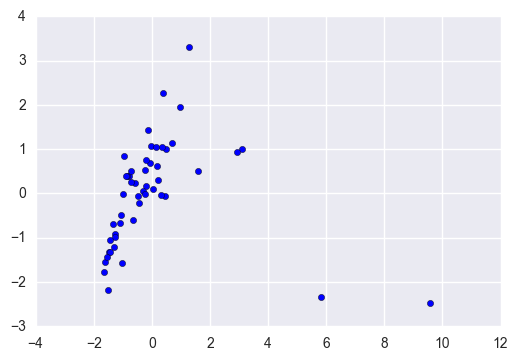

In [12]:
plt.scatter(df.PC1, df.PC2)

In [13]:
pca.explained_variance_ratio_

array([ 0.60954372,  0.22996119])

In [14]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 4)
df["clusterID"] = k_means.fit_predict(x_cols_std)
df.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989,2
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096,2


In [16]:
centroids = k_means.cluster_centers_
centroids_ts = pca.transform(centroids)

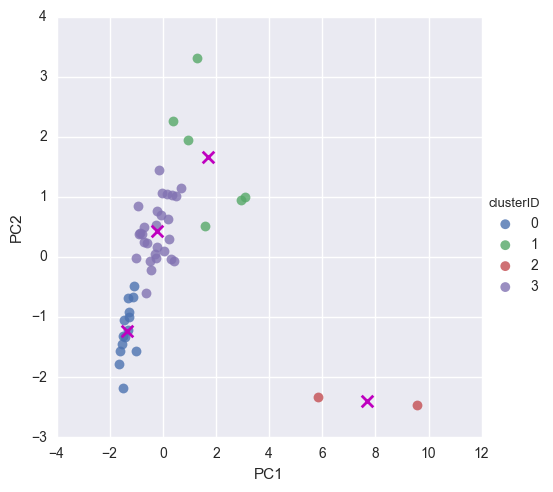

In [17]:
sns.lmplot(x = 'PC1', y = 'PC2', hue = "clusterID", data=df, fit_reg= False, scatter_kws={"s": 50}) 
plt.scatter(centroids_ts[:, 0], centroids_ts[:, 1], marker = "x", color = 'm', s=70, linewidths=2)

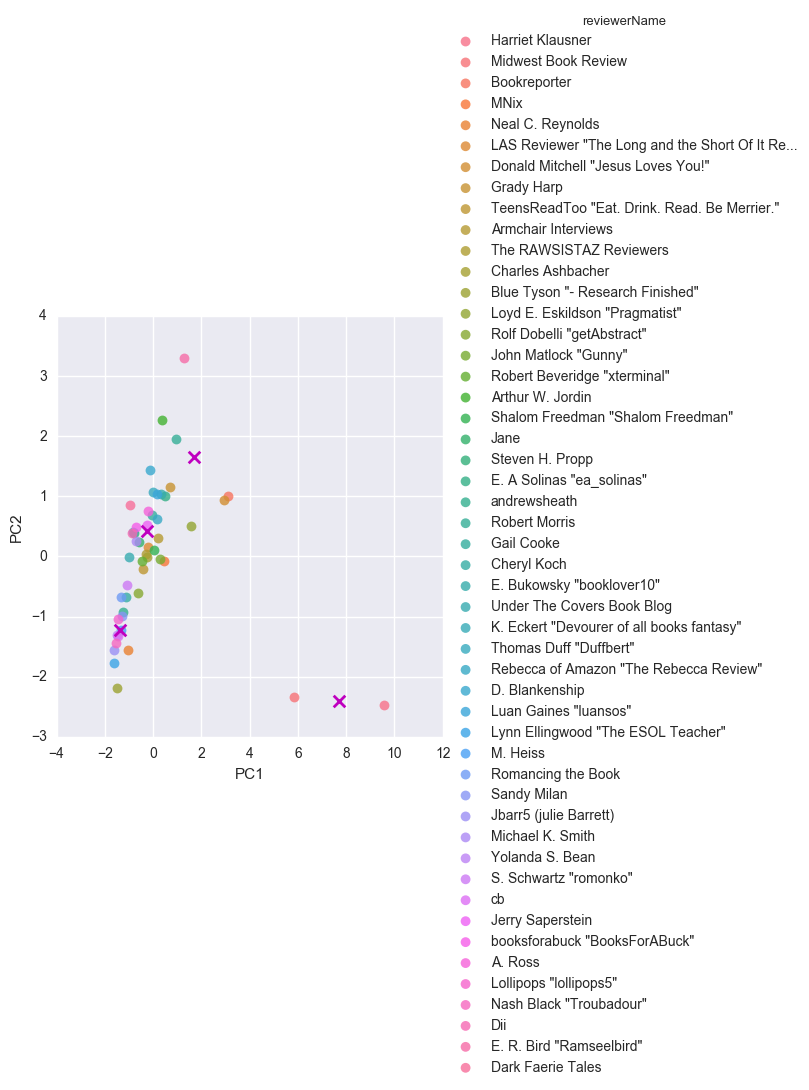

In [18]:
sns.lmplot(x = 'PC1', y = 'PC2', hue = "reviewerName", data=df, fit_reg= False, scatter_kws={"s": 50}) 
plt.scatter(centroids_ts[:, 0], centroids_ts[:, 1], marker = "x", color = 'm', s=70, linewidths=2)

In [19]:
df.clusterID.value_counts()

3    28
0    14
1     6
2     2
Name: clusterID, dtype: int64

In [20]:
df[df.clusterID == 2]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989,2
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096,2


In [21]:
df[df.clusterID == 1]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
2,A2F6N60Z96CAJI,Bookreporter,5878,42720,35865,3505967,596.455767,0.677867,3.098239,1.000514,1
6,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",2906,70212,63314,1416486,487.434962,0.740617,2.923451,0.943715,1
13,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",2121,59394,39485,934557,440.620934,0.636121,1.588873,0.508247,1
17,A1I2O9Y3X3HXLS,Arthur W. Jordin,1832,13405,10425,1334302,728.330786,0.735539,0.388142,2.270614,1
23,A26JGAM6GZMM4V,Robert Morris,1592,30327,27354,956730,600.961055,0.810562,0.963459,1.947439,1
48,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",1236,32474,28842,1078021,872.185275,0.857057,1.274159,3.303735,1


In [22]:
df[df.clusterID == 0]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
4,AHUT55E980RDR,Neal C. Reynolds,3061,5904,4555,331795,108.394316,0.425362,-1.026528,-1.561838,0
12,A1X8VZWTOG8IS6,"Blue Tyson ""- Research Finished""",2296,5947,1776,261911,114.072735,0.220197,-1.500380,-2.182772,0
22,A1JLU5H1CCENWX,andrewsheath,1621,2461,2041,348282,214.856262,0.436774,-1.260312,-0.920968,0
25,A27R2V3WLS43LP,Cheryl Koch,1556,4818,3379,399862,256.980720,0.456758,-1.110800,-0.671679,0
33,A25KKXUQQ0OLWB,"Lynn Ellingwood ""The ESOL Teacher""",1420,2075,1347,163836,115.377465,0.309440,-1.631041,-1.773695,0
34,A13G1TKIKHGV3F,M. Heiss,1399,5086,3251,179007,127.953538,0.455282,-1.315458,-1.216961,0
35,A26J2TRDPZH7RZ,Romancing the Book,1392,1367,1163,484511,348.068247,0.335039,-1.325760,-0.679816,0
36,A2VXSQHJWZAQGY,Sandy Milan,1377,3766,2952,222093,161.287582,0.477045,-1.282698,-0.991758,0
37,A37BRR2L8PX3R2,Jbarr5 (julie Barrett),1354,1341,985,265080,195.775480,0.270157,-1.619288,-1.557469,0
39,A1D5RCOILPC9LX,Yolanda S. Bean,1333,2422,1740,238341,178.800450,0.361100,-1.482807,-1.313629,0


In [24]:
df_3 = df[df.clusterID == 3]
df_3

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845,0.438401,-0.067309,3
5,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",2948,6464,5691,1244302,422.083446,0.532196,-0.217148,0.160987,3
7,A328S9RN3U5M68,Grady Harp,2795,20336,18026,1051096,376.062970,0.880532,0.695775,1.148760,3
8,A2TX179XAT5GRP,"TeensReadToo ""Eat. Drink. Read. Be Merrier.""",2527,9235,7901,770812,305.030471,0.561166,-0.427619,-0.207937,3
9,A21NVBFIEQWDSG,Armchair Interviews,2526,19493,16992,740568,293.178147,0.731353,0.214231,0.300516,3
10,A2VKWLCNZF4ZVB,The RAWSISTAZ Reviewers,2433,10328,9148,726446,298.580353,0.639844,-0.307226,0.044596,3
11,A1S3C5OFU508P3,Charles Ashbacher,2317,13230,11287,734176,316.864912,0.600394,-0.247977,-0.014246,3
14,A1NATT3PN24QWY,"Rolf Dobelli ""getAbstract""",2050,11510,9450,301470,147.058537,0.631491,-0.637473,-0.601545,3
15,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",1973,29581,23626,390410,197.876330,0.745602,0.301621,-0.039822,3
16,A2EDZH51XHFA9B,"Robert Beveridge ""xterminal""",1860,12971,9326,628768,338.047312,0.545802,-0.476268,-0.068464,3


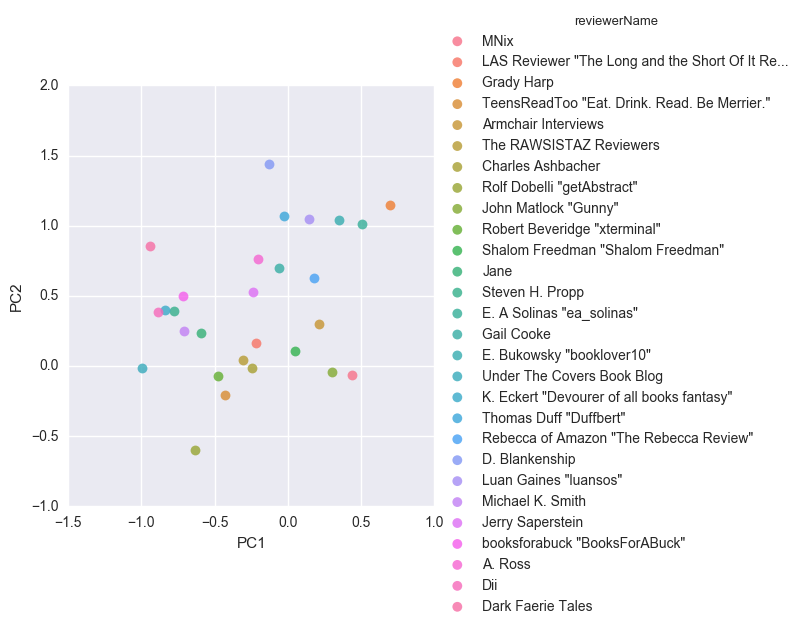

In [25]:
sns.lmplot(x = 'PC1', y = 'PC2', hue = "reviewerName", data=df_3, fit_reg= False, scatter_kws={"s": 50}) 

In [28]:
df3 = df_3.copy()

In [32]:
df3 = df3.drop(['PC1', 'PC2', 'clusterID'], axis = 1)

In [33]:
x_cols_3 = df3.ix[:, 2:]
std_scale = preprocessing.StandardScaler().fit(x_cols_3)
x_cols_3_std = std_scale.transform(x_cols_3)
pca = PCA(n_components=2)
df3["PC1"] = pca.fit_transform(x_cols_3_std)[:, 0]
df3["PC2"] = pca.fit_transform(x_cols_3_std)[:, 1]
k_means = KMeans(n_clusters = 4)
df3["clusterID"] = k_means.fit_predict(x_cols_3_std)
df3.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845,0.983391,4.633540,3
5,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",2948,6464,5691,1244302,422.083446,0.532196,2.152580,2.300047,3


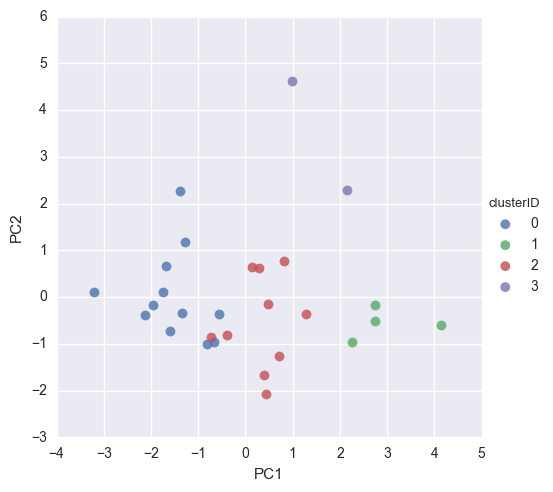

In [34]:
sns.lmplot(x = 'PC1', y = 'PC2', hue = "clusterID", data=df3, fit_reg= False, scatter_kws={"s": 50}) 

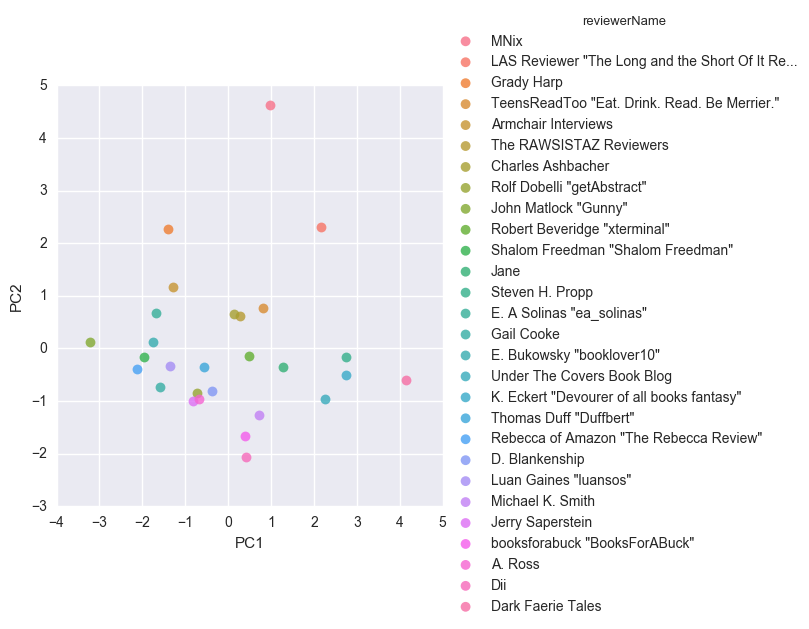

In [35]:
sns.lmplot(x = 'PC1', y = 'PC2', hue = "reviewerName", data=df3, fit_reg= False, scatter_kws={"s": 50}) 

In [36]:
df3.clusterID.value_counts()

0    12
2    10
1     4
3     2
Name: clusterID, dtype: int64

In [37]:
df3[df3.clusterID == 3]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845,0.983391,4.633540,3
5,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",2948,6464,5691,1244302,422.083446,0.532196,2.152580,2.300047,3


In [38]:
df3[df3.clusterID == 1]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
20,A2OJW07GQRNJUT,Steven H. Propp,1685,3041,2628,845293,501.657567,0.461454,2.749722,-0.164071,1
27,A1JKGTL51HHTU1,Under The Covers Book Blog,1524,2495,2129,615012,403.551181,0.462175,2.255672,-0.955109,1
28,A22B13EJTZKCTM,"K. Eckert ""Devourer of all books fantasy""",1514,3337,2644,775191,512.015192,0.448048,2.744213,-0.507357,1
49,A3U7ELIED4WP4R,Dark Faerie Tales,1228,1773,1417,866118,705.307818,0.330286,4.142833,-0.593243,1


In [39]:
df3[df3.clusterID == 2]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
8,A2TX179XAT5GRP,"TeensReadToo ""Eat. Drink. Read. Be Merrier.""",2527,9235,7901,770812,305.030471,0.561166,0.815708,0.775459,2
10,A2VKWLCNZF4ZVB,The RAWSISTAZ Reviewers,2433,10328,9148,726446,298.580353,0.639844,0.282036,0.612699,2
11,A1S3C5OFU508P3,Charles Ashbacher,2317,13230,11287,734176,316.864912,0.600394,0.137263,0.649459,2
14,A1NATT3PN24QWY,"Rolf Dobelli ""getAbstract""",2050,11510,9450,301470,147.058537,0.631491,-0.733476,-0.844329,2
16,A2EDZH51XHFA9B,"Robert Beveridge ""xterminal""",1860,12971,9326,628768,338.047312,0.545802,0.474769,-0.145558,2
19,A1CNQTCRQ35IMM,Jane,1695,8419,6600,683441,403.210029,0.544041,1.272501,-0.352515,2
31,A1MC6BFHWY6WC3,D. Blankenship,1436,9982,9370,585726,407.887187,0.877999,-0.387673,-0.807957,2
38,A2GBJQ9THOYDAJ,Michael K. Smith,1337,7941,6900,477102,356.845176,0.595078,0.719845,-1.263788,2
43,A2CR57GAJKNWVV,"booksforabuck ""BooksForABuck""",1244,6240,5045,401835,323.018489,0.702753,0.381616,-1.668896,2
47,A18JHVX925K101,Dii,1237,2367,2158,322836,260.983023,0.742448,0.423690,-2.065954,2


In [40]:
df3[df3.clusterID == 0]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
7,A328S9RN3U5M68,Grady Harp,2795,20336,18026,1051096,376.062970,0.880532,-1.394759,2.267008,0
9,A21NVBFIEQWDSG,Armchair Interviews,2526,19493,16992,740568,293.178147,0.731353,-1.289332,1.168818,0
15,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",1973,29581,23626,390410,197.876330,0.745602,-3.215733,0.115624,0
18,AHD101501WCN1,"Shalom Freedman ""Shalom Freedman""",1730,26518,17356,472982,273.400000,0.683724,-1.950253,-0.165410,0
21,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",1624,27192,24020,752105,463.118842,0.709573,-1.692511,0.669687,0
24,A3M174IC0VXOS2,Gail Cooke,1575,16546,14314,445763,283.024127,0.827966,-1.590126,-0.732556,0
26,AC1K4OQOZ90RS,"E. Bukowsky ""booklover10""",1546,23488,21175,637655,412.454722,0.774243,-1.754314,0.112466,0
29,A3R19YKNL641X3,"Thomas Duff ""Duffbert""",1488,15495,13882,631628,424.481183,0.758509,-0.556329,-0.355926,0
30,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",1476,23143,20975,478956,324.495935,0.761835,-2.130027,-0.386433,0
32,A2MF2QVSCUI27G,"Luan Gaines ""luansos""",1427,20414,17430,579664,406.211633,0.776632,-1.344679,-0.340401,0


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [118]:
dist_all = 1 - cosine_similarity(x_cols_std)

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos_all = mds.fit_transform(dist_all)  # shape (n_components, n_samples)

df['x_mds'] = pos_all[:, 0]
df['y_mds'] = pos_all[:, 1]
df.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID,x_mds,y_mds
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989,2,-0.439528,-1.013474
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096,2,-0.631226,-0.879084


In [119]:
df_all = df.drop(["reviewerID", "numReviews", "totalVote","helpfulVote", "wordLength", "meanLength","percHelpful", "PC1", "PC2"], axis = 1)
df_all.head(2)

,reviewerName,clusterID,x_mds,y_mds
0,Harriet Klausner,2,-0.439528,-1.013474
1,Midwest Book Review,2,-0.631226,-0.879084


In [157]:
import mpld3

In [158]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

#set up cluster names using a dict
cluster_names = {0: 'cluster 0', 
                 1: 'cluster 1', 
                 2: 'cluster 2', 
                 3: 'cluster 3'}

In [167]:
groups = df_all.groupby('clusterID')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14, 7)) #set plot size
ax.margins(0.25) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group['x_mds'], group['y_mds'], marker='o', linestyle='', ms=12, 
                     label=clusterID[name], mec='none',
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.reviewerName]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    #ax.axes.get_xaxis().set_visible(True)
    #ax.axes.get_yaxis().set_visible(True)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot
#mpld3.save_html(fig, "my_fig.html")
#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [ ]:
dist = 1 - cosine_similarity(x_cols_3_std)

In [44]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [78]:
df3['xs'] = xs
df3['ys'] = ys
df3.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID,xs,ys
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845,0.983391,4.633540,3,-0.422221,-0.780541
5,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",2948,6464,5691,1244302,422.083446,0.532196,2.152580,2.300047,3,0.122703,-0.930322


In [79]:
df4 = df3.drop(["reviewerID", "numReviews", "totalVote","helpfulVote", "wordLength", "meanLength","percHelpful", "PC1", "PC2"], axis = 1)

In [80]:
df4.head(2)

,reviewerName,clusterID,xs,ys
3,MNix,3,-0.422221,-0.780541
5,"LAS Reviewer ""The Long and the Short Of It Re...",3,0.122703,-0.930322


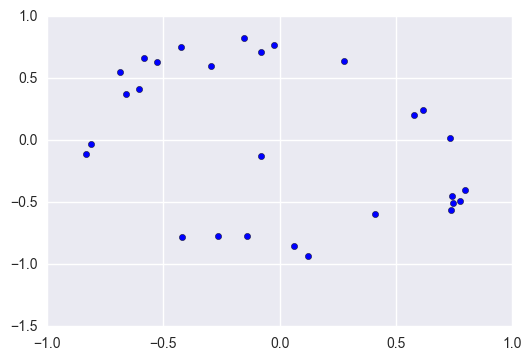

In [85]:
plt.scatter(df4['xs'], df4['ys'])

In [87]:
df3.head(1)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID,xs,ys
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845,0.983391,4.63354,3,-0.422221,-0.780541


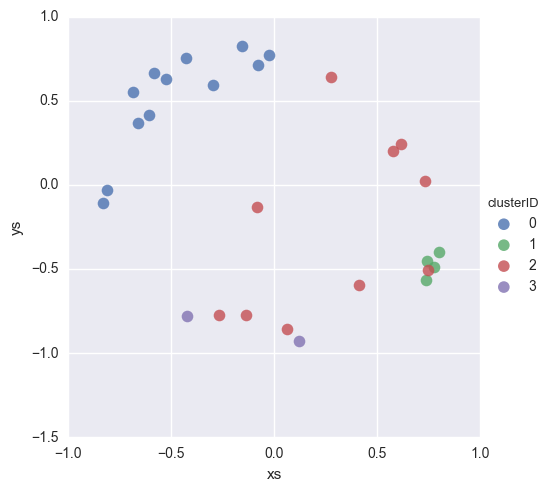

In [92]:
sns.lmplot(x = 'xs', y = 'ys', hue = "clusterID", data=df3, fit_reg= False, scatter_kws={"s": 70}) 

In [53]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [168]:
#group by cluster
groups = df4.groupby('clusterID')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,7)) #set plot size
ax.margins(0.25) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group['xs'], group['ys'], marker='o', linestyle='', ms=14, 
                     label=clusterID[name], mec='none',
                     color=cluster_colors[name])
    #ax.set_aspect('auto')
    labels = [i for i in group.reviewerName]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=20, hoffset=20, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    #ax.axes.get_xaxis().set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)